동적 그래프 확인 링크 : https://nbviewer.jupyter.org/github/hbhb0311/Visualization/blob/main/CovidTrash.ipynb

코로나로 인한 재택지수 및 배달건수, 앱 이용량, 국내 택배 물동량의 변화를 시각화함
<br>
이를 통해 코로나로 인한 쓰레기 배출량의 증가를 예측

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

import os
import warnings
warnings.filterwarnings('ignore')

plt.rc('font', family = 'AppleGothic')
plt.rc('axes', unicode_minus = False)
%config InlineBackend.figure_format = 'retina'
fontname = 'AppleGothic'

# 1. 재택지수 데이터 
<br>

- 연도별 재택지수 비교
- 각 연도별 월별 재택지수 비교

<br>

데이터 출처 : https://kdx.kr/data/view/6972

## 1.1 데이터 불러오고 정제

In [2]:
hidx = pd.read_csv('data/Home_Activity_Index.csv')
hidx.head()

dt  age_cd  sex_cd home_sido_nm  h0d0h0_dur_r  h0d0h1_dur_r  \
0  20181029     NaN     NaN         경상남도      0.166836      0.833054   
1  20181029     NaN     NaN         전라북도      0.174534      0.825149   
2  20181029     NaN     NaN         전라남도      0.173301      0.826440   
3  20181029     NaN     NaN         충청남도      0.175661      0.823899   
4  20181029     NaN     NaN          NaN      0.169477      0.830302   

   h0d1h0_dur_r  h0d1h1_dur_r  h1d0h0_dur_r  h1d0h1_dur_r  h1d1h0_dur_r  \
0      0.467698      0.532190      0.203548      0.795637      0.407189   
1      0.471113      0.528571      0.204232      0.793462      0.408986   
2      0.461816      0.537923      0.210939      0.787248      0.416458   
3      0.475354      0.524204      0.239265      0.758896      0.427152   
4      0.484912      0.514864      0.197705      0.801207      0.388608   

   h1d1h1_dur_r  
0      0.591995  
1      0.588710  
2      0.581742  
3      0.571001  
4      0.610308

In [3]:
hidx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dt            2772 non-null   int64  
 1   age_cd        792 non-null    float64
 2   sex_cd        198 non-null    float64
 3   home_sido_nm  1683 non-null   object 
 4   h0d0h0_dur_r  2772 non-null   float64
 5   h0d0h1_dur_r  2772 non-null   float64
 6   h0d1h0_dur_r  2772 non-null   float64
 7   h0d1h1_dur_r  2772 non-null   float64
 8   h1d0h0_dur_r  2772 non-null   float64
 9   h1d0h1_dur_r  2772 non-null   float64
 10  h1d1h0_dur_r  2772 non-null   float64
 11  h1d1h1_dur_r  2772 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 260.0+ KB


In [4]:
hidx['age_cd'].unique()

array([nan, 50., 60., 20., 10., 70.,  0., 30., 40.])

In [5]:
hidx['sex_cd'].unique()

array([nan,  2.,  1.])

In [6]:
hidx['home_sido_nm'].unique()

array(['경상남도', '전라북도', '전라남도', '충청남도', nan, '경상북도', '세종특별자치시', '경기도',
       '광주광역시', '충청북도', '제주특별자치도', '인천광역시', '부산광역시', '서울특별시', '대전광역시',
       '울산광역시', '대구광역시', '강원도'], dtype=object)

In [7]:
hidx1 = hidx[hidx['age_cd'].isnull() & hidx['sex_cd'].isnull() & hidx['home_sido_nm'].isnull()]
hidx1

dt  age_cd  sex_cd home_sido_nm  h0d0h0_dur_r  h0d0h1_dur_r  \
4     20181029     NaN     NaN          NaN      0.169477      0.830302   
39    20181105     NaN     NaN          NaN      0.167393      0.831570   
80    20181112     NaN     NaN          NaN      0.168209      0.831380   
94    20181119     NaN     NaN          NaN      0.167206      0.832517   
129   20181126     NaN     NaN          NaN      0.167841      0.831863   
...        ...     ...     ...          ...           ...           ...   
2633  20200817     NaN     NaN          NaN      0.164157      0.835696   
2681  20200824     NaN     NaN          NaN      0.146649      0.853237   
2688  20200831     NaN     NaN          NaN      0.141435      0.858467   
2733  20200907     NaN     NaN          NaN      0.143690      0.855593   
2744  20200914     NaN     NaN          NaN      0.150234      0.849636   

      h0d1h0_dur_r  h0d1h1_dur_r  h1d0h0_dur_r  h1d0h1_dur_r  h1d1h0_dur_r  \
4         0.484912      0.514864      0.197705      0.801207      0.388608   
39        0.478517      0.520444      0.193548      0.806157      0.375405   
80        0.479196      0.520392      0.196675      0.803020      0.378299   
94        0.477306      0.522416      0.191222      0.808450      0.357341   
129       0.477450      0.522253      0.189658      0.809217      0.360841   
...            ...           ...           ...           ...           ...   
2633      0.428228      0.571625      0.164748      0.835187      0.304974   
2681      0.403955      0.595931      0.148492      0.851268      0.268423   
2688      0.399269      0.600633      0.149267      0.850167      0.275415   
2733      0.404244      0.595038      0.158167      0.841622      0.296118   
2744      0.424249      0.575621      0.164736      0.835069      0.318531   

      h1d1h1_dur_r  
4         0.610308  
39        0.624302  
80        0.621397  
94        0.642333  
129       0.638037  
...            ...  
2633      0.694960  
2681      0.731337  
2688      0.724018  
2733      0.703672  
2744      0.681273  

[99 rows x 12 columns]

In [8]:
drop_rows = []

for i in range(1, 4):
    drop_rows.append(hidx.columns[i])
    
for i in range(4, 11):
    if i % 2 == 0:
        drop_rows.append(hidx.columns[i])

drop_rows

['age_cd',
 'sex_cd',
 'home_sido_nm',
 'h0d0h0_dur_r',
 'h0d1h0_dur_r',
 'h1d0h0_dur_r',
 'h1d1h0_dur_r']

In [9]:
hidxdrop = hidx1.drop(drop_rows, axis = 1)
hidxdrop.head()

dt  h0d0h1_dur_r  h0d1h1_dur_r  h1d0h1_dur_r  h1d1h1_dur_r
4    20181029      0.830302      0.514864      0.801207      0.610308
39   20181105      0.831570      0.520444      0.806157      0.624302
80   20181112      0.831380      0.520392      0.803020      0.621397
94   20181119      0.832517      0.522416      0.808450      0.642333
129  20181126      0.831863      0.522253      0.809217      0.638037

In [10]:
hidxdrop.columns = ['날짜', '평일야간재택지수', '평일주간재택지수', '휴일야간재택지수', '휴일주간재택지수']

hidxdrop.head()

날짜  평일야간재택지수  평일주간재택지수  휴일야간재택지수  휴일주간재택지수
4    20181029  0.830302  0.514864  0.801207  0.610308
39   20181105  0.831570  0.520444  0.806157  0.624302
80   20181112  0.831380  0.520392  0.803020  0.621397
94   20181119  0.832517  0.522416  0.808450  0.642333
129  20181126  0.831863  0.522253  0.809217  0.638037

In [11]:
hidxdrop['날짜'] = pd.to_datetime(hidxdrop['날짜'], format = '%Y%m%d')
hidxdrop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 4 to 2744
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   날짜        99 non-null     datetime64[ns]
 1   평일야간재택지수  99 non-null     float64       
 2   평일주간재택지수  99 non-null     float64       
 3   휴일야간재택지수  99 non-null     float64       
 4   휴일주간재택지수  99 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 4.6 KB


In [12]:
hidxdrop.head()

날짜  평일야간재택지수  평일주간재택지수  휴일야간재택지수  휴일주간재택지수
4   2018-10-29  0.830302  0.514864  0.801207  0.610308
39  2018-11-05  0.831570  0.520444  0.806157  0.624302
80  2018-11-12  0.831380  0.520392  0.803020  0.621397
94  2018-11-19  0.832517  0.522416  0.808450  0.642333
129 2018-11-26  0.831863  0.522253  0.809217  0.638037

In [13]:
# 2019년 이후의 데이터만 가져옴

hidx = hidxdrop[hidxdrop['날짜'].apply(lambda date: date.year) >= 2019]
hidx

날짜  평일야간재택지수  평일주간재택지수  휴일야간재택지수  휴일주간재택지수
299  2019-01-07  0.827066  0.538474  0.816441  0.658764
320  2019-01-14  0.821696  0.539475  0.813619  0.653043
358  2019-01-21  0.826074  0.540290  0.820437  0.656490
370  2019-01-28  0.832096  0.548270  0.779535  0.652097
403  2019-02-04  0.823877  0.554123  0.755324  0.627024
...         ...       ...       ...       ...       ...
2633 2020-08-17  0.835696  0.571625  0.835187  0.694960
2681 2020-08-24  0.853237  0.595931  0.851268  0.731337
2688 2020-08-31  0.858467  0.600633  0.850167  0.724018
2733 2020-09-07  0.855593  0.595038  0.841622  0.703672
2744 2020-09-14  0.849636  0.575621  0.835069  0.681273

[89 rows x 5 columns]

In [14]:
# 2월~8월 데이터 가져오기

hidx = hidx[(hidx['날짜'].apply(lambda date: date.month) >= 2) & \
                (hidx['날짜'].apply(lambda date: date.month) <= 8)]
hidx

날짜  평일야간재택지수  평일주간재택지수  휴일야간재택지수  휴일주간재택지수
403  2019-02-04  0.823877  0.554123  0.755324  0.627024
438  2019-02-11  0.832615  0.539093  0.827336  0.658690
453  2019-02-18  0.829734  0.543094  0.820607  0.643715
499  2019-02-25  0.824030  0.532171  0.804427  0.636834
524  2019-03-04  0.820717  0.508216  0.824913  0.655417
...         ...       ...       ...       ...       ...
2576 2020-08-03  0.826524  0.579999  0.829366  0.704587
2627 2020-08-10  0.833897  0.567335  0.790768  0.655668
2633 2020-08-17  0.835696  0.571625  0.835187  0.694960
2681 2020-08-24  0.853237  0.595931  0.851268  0.731337
2688 2020-08-31  0.858467  0.600633  0.850167  0.724018

[61 rows x 5 columns]

## 1.2 연도별 재택지수 비교

In [15]:
hidx['재택지수평균'] = hidx.mean(axis = 1)
hidx.head()

날짜  평일야간재택지수  평일주간재택지수  휴일야간재택지수  휴일주간재택지수    재택지수평균
403 2019-02-04  0.823877  0.554123  0.755324  0.627024  0.690087
438 2019-02-11  0.832615  0.539093  0.827336  0.658690  0.714434
453 2019-02-18  0.829734  0.543094  0.820607  0.643715  0.709287
499 2019-02-25  0.824030  0.532171  0.804427  0.636834  0.699366
524 2019-03-04  0.820717  0.508216  0.824913  0.655417  0.702316

In [16]:
hidx = hidx.set_index('날짜')
hidx

평일야간재택지수  평일주간재택지수  휴일야간재택지수  휴일주간재택지수    재택지수평균
날짜                                                          
2019-02-04  0.823877  0.554123  0.755324  0.627024  0.690087
2019-02-11  0.832615  0.539093  0.827336  0.658690  0.714434
2019-02-18  0.829734  0.543094  0.820607  0.643715  0.709287
2019-02-25  0.824030  0.532171  0.804427  0.636834  0.699366
2019-03-04  0.820717  0.508216  0.824913  0.655417  0.702316
...              ...       ...       ...       ...       ...
2020-08-03  0.826524  0.579999  0.829366  0.704587  0.735119
2020-08-10  0.833897  0.567335  0.790768  0.655668  0.711917
2020-08-17  0.835696  0.571625  0.835187  0.694960  0.734367
2020-08-24  0.853237  0.595931  0.851268  0.731337  0.757943
2020-08-31  0.858467  0.600633  0.850167  0.724018  0.758321

[61 rows x 5 columns]

In [17]:
hidx_year = hidx.groupby(lambda date: date.year).sum()['재택지수평균']
hidx_year

2019    20.777269
2020    22.967851
Name: 재택지수평균, dtype: float64

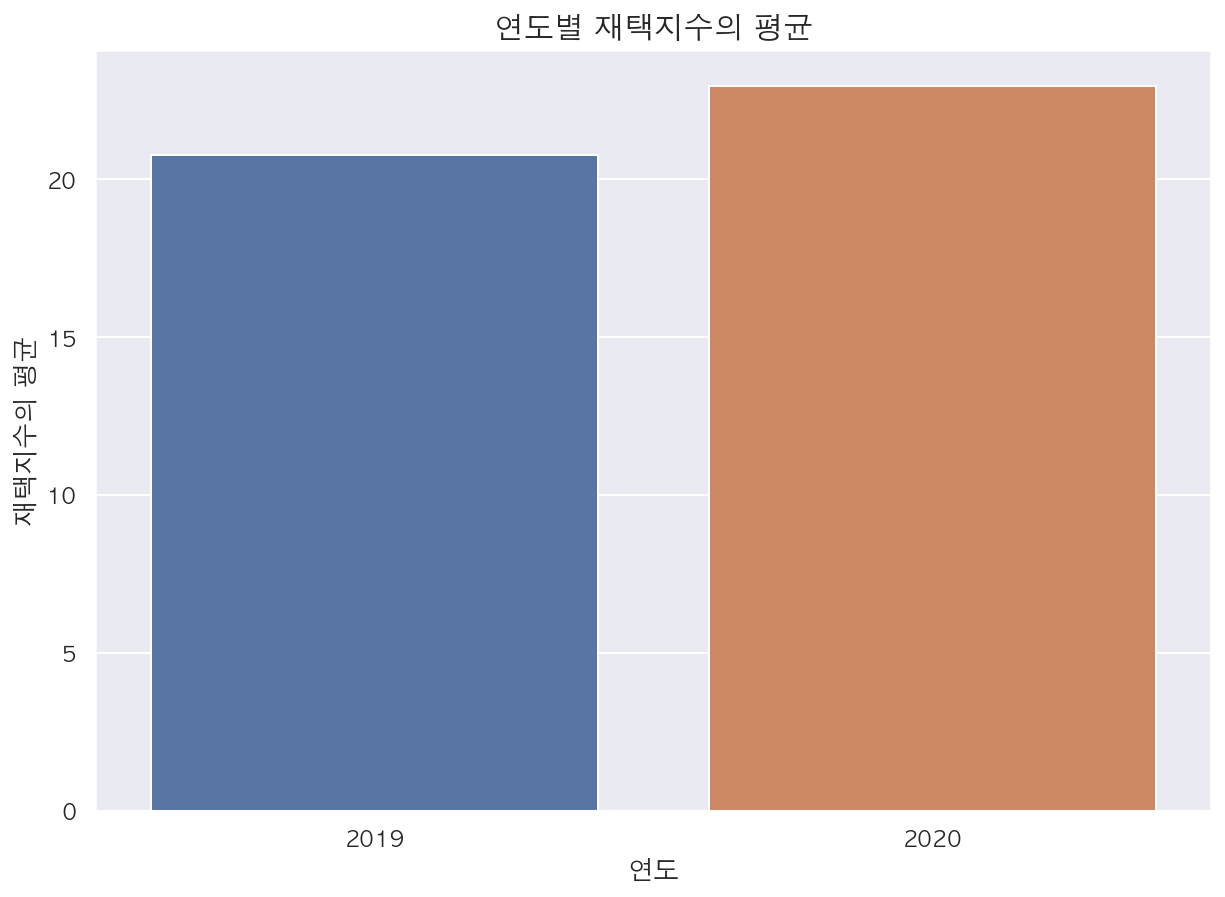

In [18]:
sns.set(style = 'darkgrid', font = fontname)
plt.figure(figsize = (10, 7))
sns.barplot(hidx_year.index, hidx_year.values)
plt.title('연도별 재택지수의 평균', fontsize = 15)
plt.xlabel('연도', fontsize = 13)
plt.ylabel('재택지수의 평균', fontsize = 13)
plt.xticks(fontsize = 11)
plt.show()

In [19]:
# 막대 그래프에 수치도 같이 나오면 좋을 것 같아서 plotly 라이브러리를 이용해봤습니다.
fig = px.bar(x = hidx_year.index, y = hidx_year.values, text = hidx_year.values, color_continuous_scale='emrld', 
       color = hidx_year.values, labels={'x':'연도', 'y': '재택지수의 평균'})

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

fig.update_layout(title_text='연도별 재택지수의 평균',
                  xaxis = dict(
                    tickmode = 'linear',
                    tick0 = 1,
                    dtick = 1
                ))

## 1.3 각 연도별 월별 재택지수 비교

In [20]:
hidx

평일야간재택지수  평일주간재택지수  휴일야간재택지수  휴일주간재택지수    재택지수평균
날짜                                                          
2019-02-04  0.823877  0.554123  0.755324  0.627024  0.690087
2019-02-11  0.832615  0.539093  0.827336  0.658690  0.714434
2019-02-18  0.829734  0.543094  0.820607  0.643715  0.709287
2019-02-25  0.824030  0.532171  0.804427  0.636834  0.699366
2019-03-04  0.820717  0.508216  0.824913  0.655417  0.702316
...              ...       ...       ...       ...       ...
2020-08-03  0.826524  0.579999  0.829366  0.704587  0.735119
2020-08-10  0.833897  0.567335  0.790768  0.655668  0.711917
2020-08-17  0.835696  0.571625  0.835187  0.694960  0.734367
2020-08-24  0.853237  0.595931  0.851268  0.731337  0.757943
2020-08-31  0.858467  0.600633  0.850167  0.724018  0.758321

[61 rows x 5 columns]

In [21]:
hidx_m = hidx.groupby(lambda date: str(date.year) + '0' + str(date.month))['재택지수평균'].mean()
hidx_m

201902    0.703293
201903    0.701720
201904    0.690113
201905    0.694332
201906    0.695174
201907    0.693221
201908    0.670630
202002    0.752340
202003    0.761323
202004    0.745208
202005    0.734540
202006    0.726458
202007    0.725732
202008    0.739533
Name: 재택지수평균, dtype: float64

In [22]:
hidx_m.index

Index(['201902', '201903', '201904', '201905', '201906', '201907', '201908',
       '202002', '202003', '202004', '202005', '202006', '202007', '202008'],
      dtype='object')

In [23]:
hidx_m.values[:7]

array([0.70329339, 0.70172008, 0.69011267, 0.69433235, 0.69517425,
       0.69322125, 0.67062986])

In [24]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=hidx_m.index,
    y=hidx_m.values[:7],
    name='2019년',
    marker_color='indianred',
    text = hidx_m.values[:7]
))

fig.add_trace(go.Bar(
    x=hidx_m.index,
    y=hidx_m.values[7:],
    name='2020년',
    marker_color='lightsalmon',
    text = hidx_m.values[7:]
))

fig.update_layout(barmode='group', title_text='연도별 재택지수 변화 (2월~8월)',  xaxis_title="월",
                  yaxis_title="재택지수의 합", font=dict(size=15),
                  xaxis = dict(
                        tickmode = 'array',
                        tickvals = [x for x in range(7)],
                        ticktext = [str(x) + '월' for x in range(2, 9)]
                    ))

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
                
fig.show()

## 1.4 주별 재택지수 시각화

In [25]:
hidx = hidx.reset_index()
hidx['주'] = hidx['날짜'].dt.week
hidx

날짜  평일야간재택지수  평일주간재택지수  휴일야간재택지수  휴일주간재택지수    재택지수평균   주
0  2019-02-04  0.823877  0.554123  0.755324  0.627024  0.690087   6
1  2019-02-11  0.832615  0.539093  0.827336  0.658690  0.714434   7
2  2019-02-18  0.829734  0.543094  0.820607  0.643715  0.709287   8
3  2019-02-25  0.824030  0.532171  0.804427  0.636834  0.699366   9
4  2019-03-04  0.820717  0.508216  0.824913  0.655417  0.702316  10
..        ...       ...       ...       ...       ...       ...  ..
56 2020-08-03  0.826524  0.579999  0.829366  0.704587  0.735119  32
57 2020-08-10  0.833897  0.567335  0.790768  0.655668  0.711917  33
58 2020-08-17  0.835696  0.571625  0.835187  0.694960  0.734367  34
59 2020-08-24  0.853237  0.595931  0.851268  0.731337  0.757943  35
60 2020-08-31  0.858467  0.600633  0.850167  0.724018  0.758321  36

[61 rows x 7 columns]

In [26]:
hidx19 = hidx[hidx['날짜'].dt.year == 2019]
hidx20 = hidx[hidx['날짜'].dt.year == 2020]

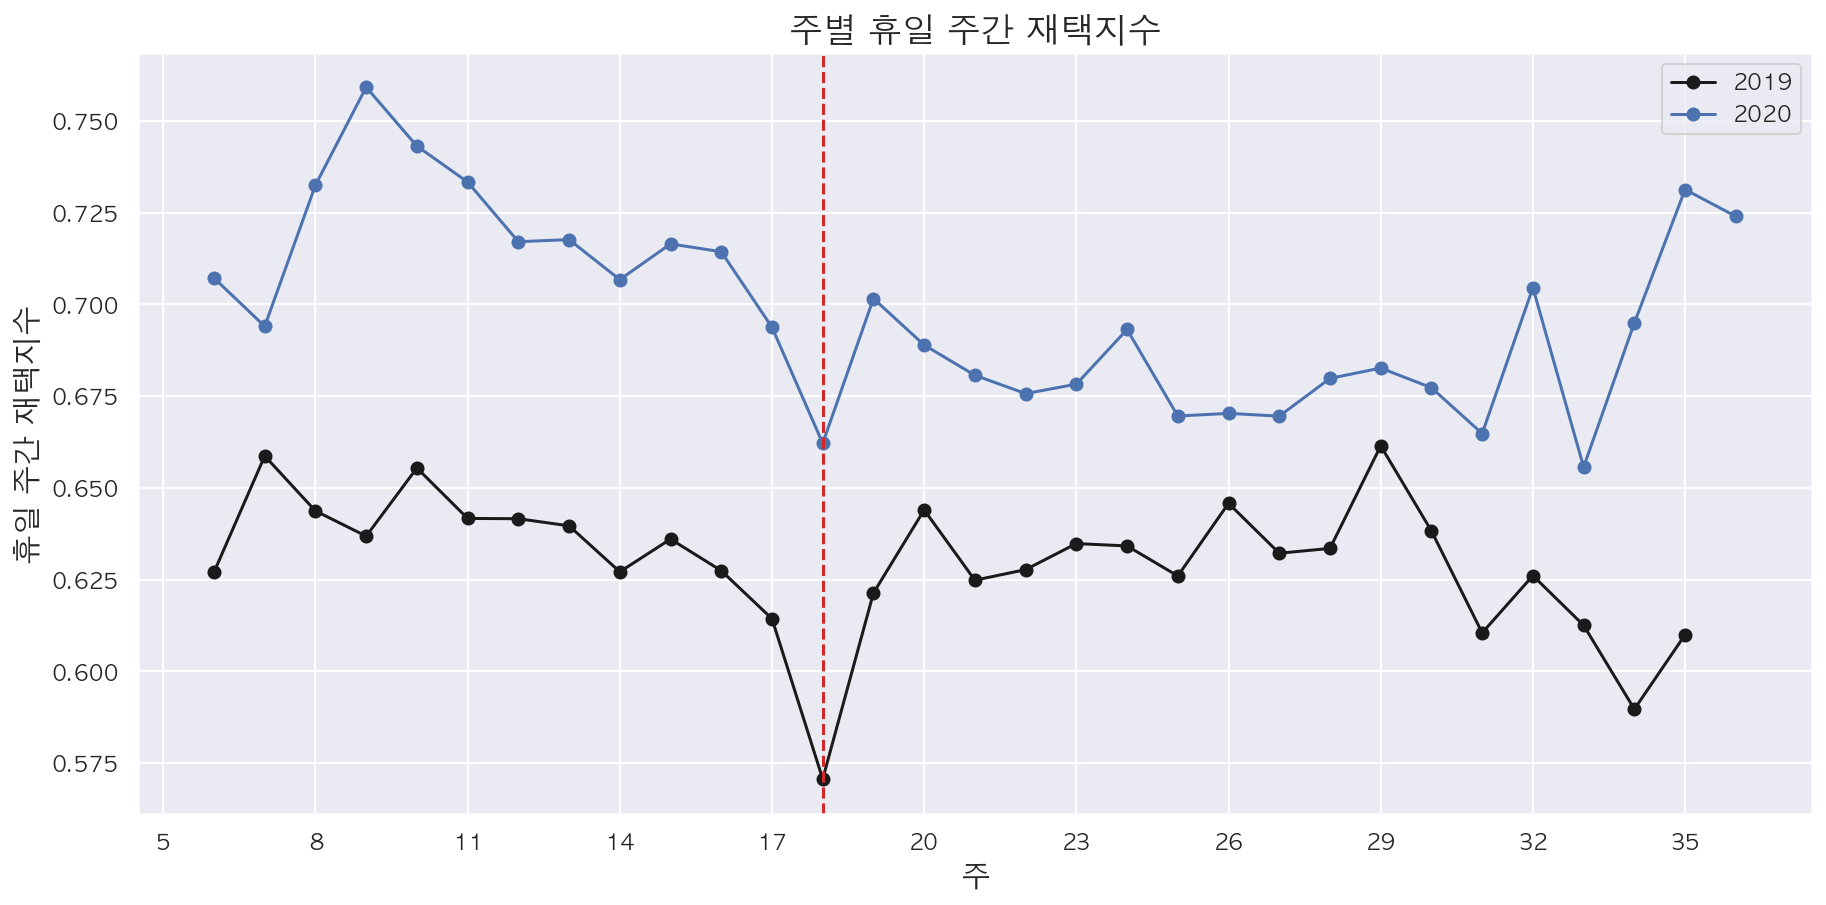

In [27]:
plt.figure(figsize = (15, 7))
plt.plot(hidx19['주'], hidx19['휴일주간재택지수'], 'ko-', label = '2019')
plt.plot(hidx20['주'], hidx20['휴일주간재택지수'], 'bo-', label = '2020')
plt.axvline(18, color='tab:red', linestyle = '--')
plt.xticks(np.arange(5, 37, 3), np.arange(5, 37, 3))

plt.title('주별 휴일 주간 재택지수', fontsize = 17)
plt.xlabel('주', fontsize = 15)
plt.ylabel('휴일 주간 재택지수', fontsize = 15)

plt.legend()
plt.show()

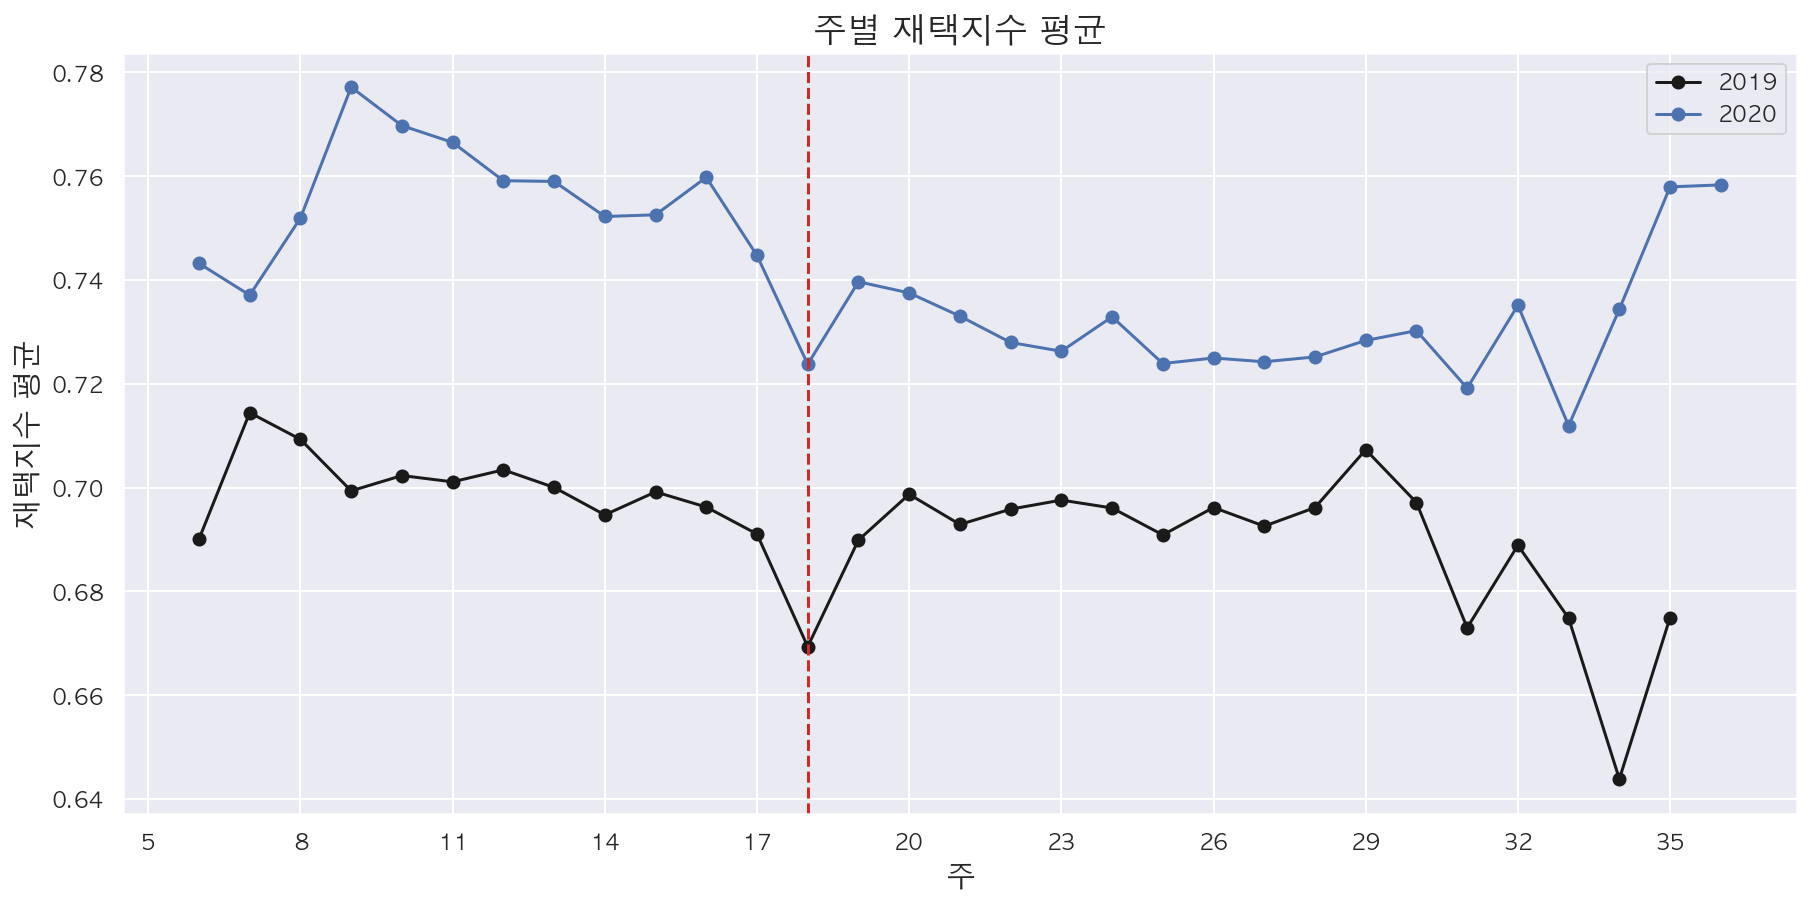

In [28]:
plt.figure(figsize = (15, 7))
plt.plot(hidx19['주'], hidx19['재택지수평균'], 'ko-', label = '2019')
plt.plot(hidx20['주'], hidx20['재택지수평균'], 'bo-', label = '2020')
plt.axvline(18, color='tab:red', linestyle = '--')
plt.xticks(np.arange(5, 37, 3), np.arange(5, 37, 3))

plt.title('주별 재택지수 평균', fontsize = 17)
plt.xlabel('주', fontsize = 15)
plt.ylabel('재택지수 평균', fontsize = 15)

plt.legend()
plt.show()

In [29]:
hidx[hidx['주'] == 18]

날짜  평일야간재택지수  평일주간재택지수  휴일야간재택지수  휴일주간재택지수    재택지수평균   주
12 2019-04-29  0.821142  0.533335  0.752314  0.570625  0.669354  18
42 2020-04-27  0.835995  0.590690  0.806235  0.662130  0.723762  18

In [30]:
fig = go.Figure()

# 재택지수 평균 그래프
fig.add_trace(go.Scatter(x=hidx19['주'], y=hidx19['재택지수평균'], name='2019 재택지수',
                         line=dict(color='firebrick', width=4, dash='dot'), 
                         mode='lines+markers'
                        ))
fig.add_trace(go.Scatter(x=hidx20['주'], y=hidx20['재택지수평균'], name='2020 재택지수',
                         line=dict(color='royalblue', width=4, dash='dot'), 
                         mode='lines+markers'
                        ))


# 휴일주간 재택지수 평균 그래프
fig.add_trace(go.Scatter(x=hidx19['주'], y=hidx19['휴일주간재택지수'], name='2019 휴일주간',
                         line=dict(color='firebrick', width=4), mode='lines+markers'))
fig.add_trace(go.Scatter(x=hidx20['주'], y=hidx20['휴일주간재택지수'], name='2020 휴일주간',
                         line=dict(color='royalblue', width=4), mode='lines+markers'))

fig.update_layout(title='재택지수 변화 그래프 (2019년 vs 2020년)',
                   xaxis_title='주',
                   yaxis_title='재택지수')

# 2. 온라인 음식 서비스 데이터

## 2.1 전국 일별 배달건수 및 배달금액(delivery.csv이용)
- 데이터 출처: ([https://dacon.io/competitions/official/235618/data/](https://dacon.io/competitions/official/235618/data/))

### 2.1.1 데이터 가져오고 정제

In [31]:
delivery = pd.read_csv('data/delivery.csv', usecols = ['PROCESS_DT','DLVR_REQUST_STTUS_VALUE','GOODS_AMOUNT'])
delivery.head()

PROCESS_DT  DLVR_REQUST_STTUS_VALUE  GOODS_AMOUNT
0  2020-01-01                        1         25000
1  2020-01-01                        1         49000
2  2020-01-01                        1         23000
3  2020-01-01                        1         20000
4  2020-01-01                        1         32000

In [32]:
delivery.columns = ['날짜', '배달성공여부', '배달상품금액']

In [33]:
# 배달 완료한 데이터만 가져옴
delivery = delivery[delivery['배달성공여부'] == 1]
delivery.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5075760 entries, 0 to 5158323
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   날짜      object
 1   배달성공여부  int64 
 2   배달상품금액  int64 
dtypes: int64(2), object(1)
memory usage: 154.9+ MB


In [34]:
delivery.isnull().sum() # 결측치 개수 확인

날짜        0
배달성공여부    0
배달상품금액    0
dtype: int64

In [35]:
delivery['날짜2'] = pd.to_datetime(delivery['날짜'])

In [36]:
delivery.head()

날짜  배달성공여부  배달상품금액        날짜2
0  2020-01-01       1   25000 2020-01-01
1  2020-01-01       1   49000 2020-01-01
2  2020-01-01       1   23000 2020-01-01
3  2020-01-01       1   20000 2020-01-01
4  2020-01-01       1   32000 2020-01-01

### 2.1.2 배달 횟수, 배달 상품 금액 시각화

- matplotlib.dates에 관한 설명 : https://matplotlib.org/stable/api/dates_api.html#matplotlib.dates.date2num

In [37]:
from matplotlib.dates import date2num
import matplotlib.dates as dates

delivery['날짜3'] = date2num(delivery['날짜2'])
# date2num : datetime 데이터를 matplotlib 데이터로 변경해줌

In [38]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5075760 entries, 0 to 5158323
Data columns (total 5 columns):
 #   Column  Dtype         
---  ------  -----         
 0   날짜      object        
 1   배달성공여부  int64         
 2   배달상품금액  int64         
 3   날짜2     datetime64[ns]
 4   날짜3     float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 232.3+ MB


In [39]:
delivery.head()

날짜  배달성공여부  배달상품금액        날짜2      날짜3
0  2020-01-01       1   25000 2020-01-01  18262.0
1  2020-01-01       1   49000 2020-01-01  18262.0
2  2020-01-01       1   23000 2020-01-01  18262.0
3  2020-01-01       1   20000 2020-01-01  18262.0
4  2020-01-01       1   32000 2020-01-01  18262.0

In [40]:
deli_a = delivery.groupby('날짜3')['배달상품금액'].mean()
deli_a

날짜3
18262.0    23812.775612
18263.0    22789.959667
18264.0    23025.555686
18265.0    23472.221922
18266.0    23052.449523
               ...     
18423.0    23386.702186
18424.0    23100.579892
18425.0    23844.691251
18433.0    24227.593798
18434.0    23678.270565
Name: 배달상품금액, Length: 165, dtype: float64

In [41]:
deli_c = delivery.groupby('날짜3')['배달성공여부'].count()
deli_c

날짜3
18262.0    30064
18263.0    21496
18264.0    25536
18265.0    29569
18266.0    30717
           ...  
18423.0    33306
18424.0    30854
18425.0    35728
18433.0    41376
18434.0    43509
Name: 배달성공여부, Length: 165, dtype: int64

- 코드 참고한 사이트 : https://dacon.io/competitions/official/235618/codeshare/1399

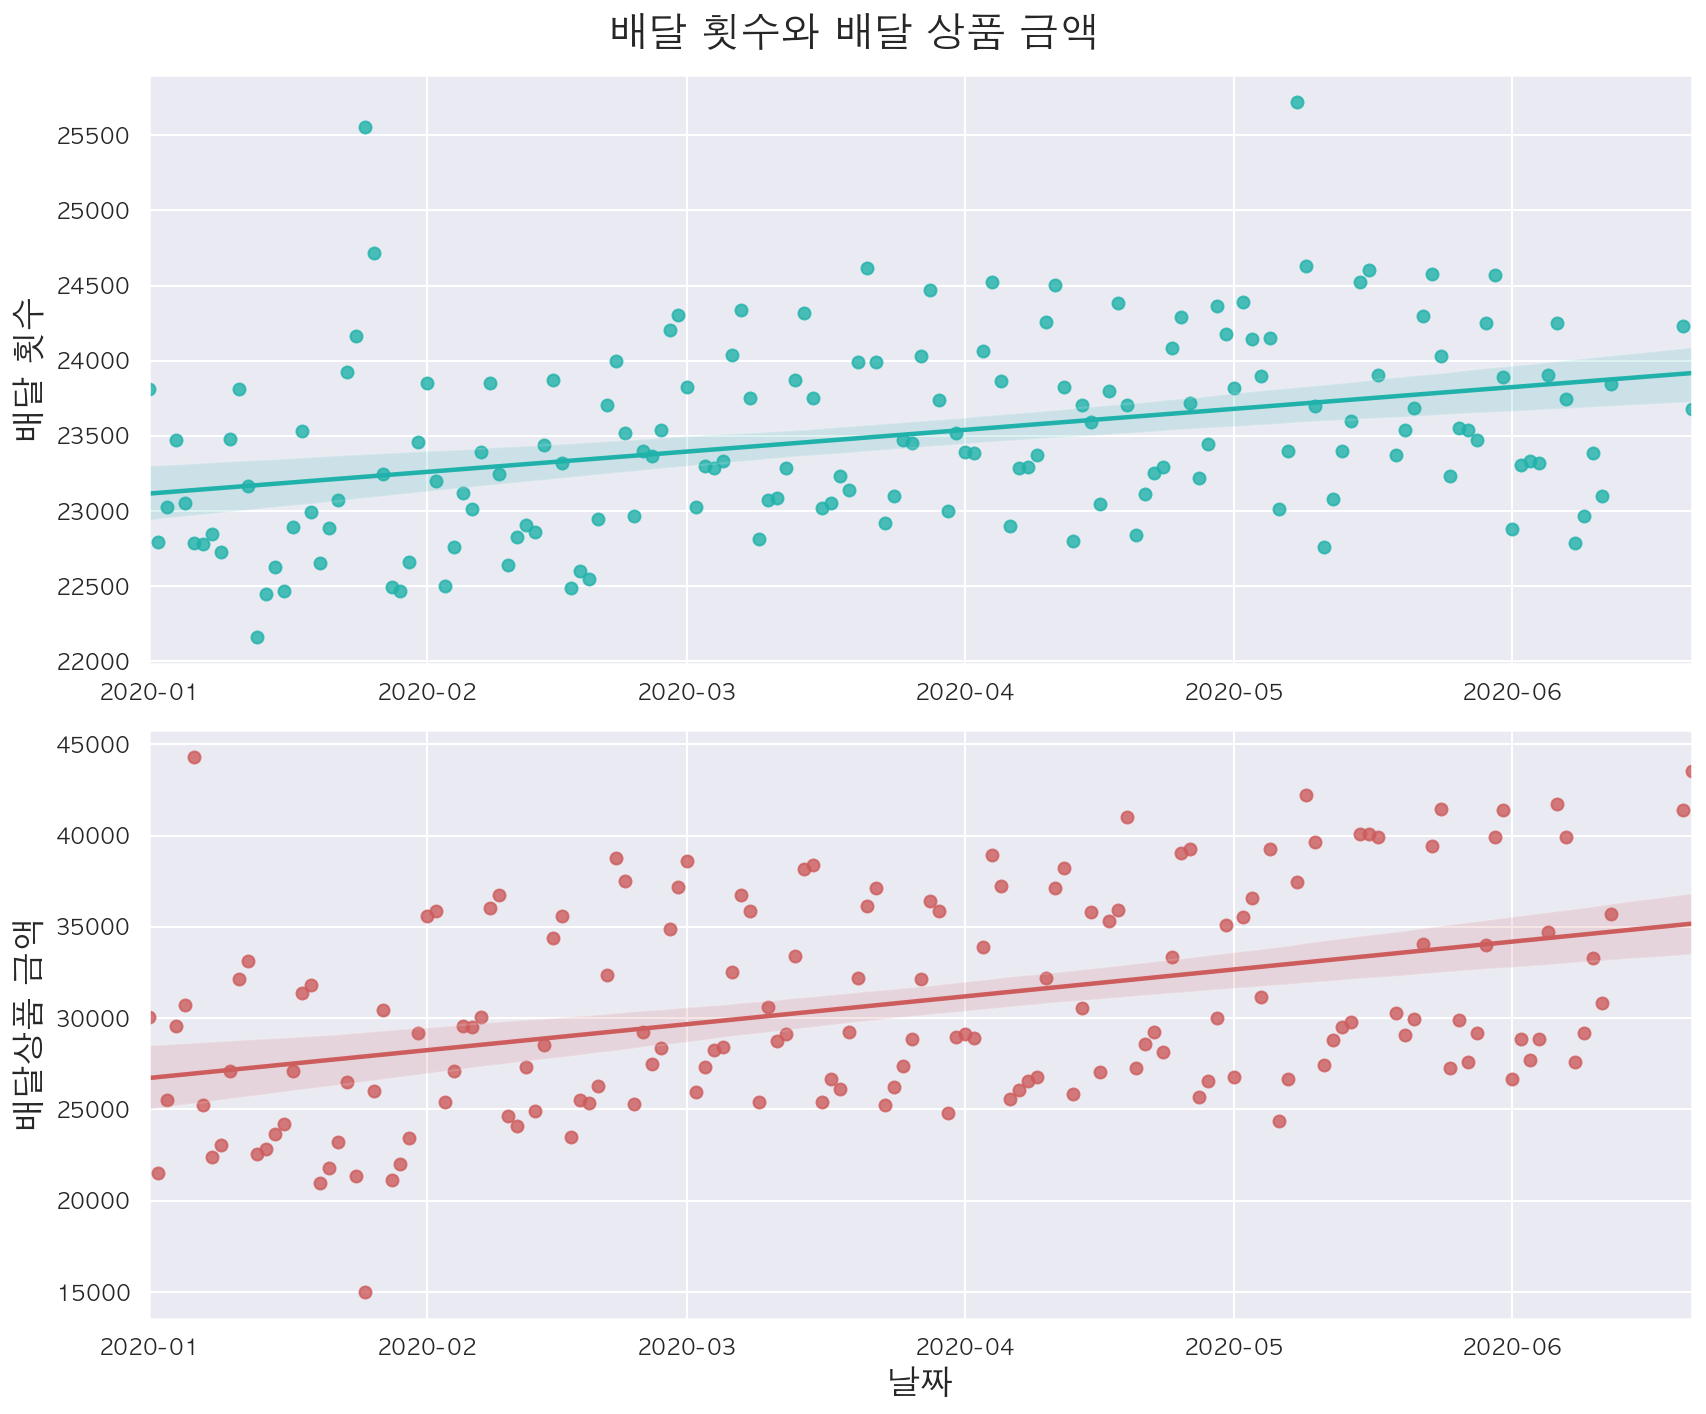

In [42]:
sns.set(style='darkgrid', font = fontname)
fig = plt.figure(figsize = (12, 10))
fig.suptitle('배달 횟수와 배달 상품 금액', fontsize = 20)

# 배달 횟수 변화 그래프 
plt.subplot(2, 1, 1)
ax1 = sns.regplot(deli_a.index, deli_a.values, color = 'lightseagreen')
loc = dates.AutoDateLocator() # x축에 맞는 날짜를 자동으로 세팅?
ax1.xaxis.set_major_locator(loc) # 세팅한 값에 맞춰 'x축' 정해줌
ax1.xaxis.set_major_formatter(dates.AutoDateFormatter(loc)) # 세팅된 값에 맞춘 'x축 라벨'지정
plt.ylabel('배달 횟수', fontsize = 17)
ax1.xaxis.label.set_visible(False)

# 배달 상품 금액 변화 그래프 
plt.subplot(2, 1, 2)
ax2 = sns.regplot(deli_c.index, deli_c.values, color = 'indianred')
loc = dates.AutoDateLocator() 
ax2.xaxis.set_major_locator(loc) 
ax2.xaxis.set_major_formatter(dates.AutoDateFormatter(loc))
plt.xlabel('날짜', fontsize = 17)
plt.ylabel('배달상품 금액', fontsize = 17)

plt.tight_layout()

- 위 코드와 비교해보기 (AutoDateLocator -> MonthLocator)

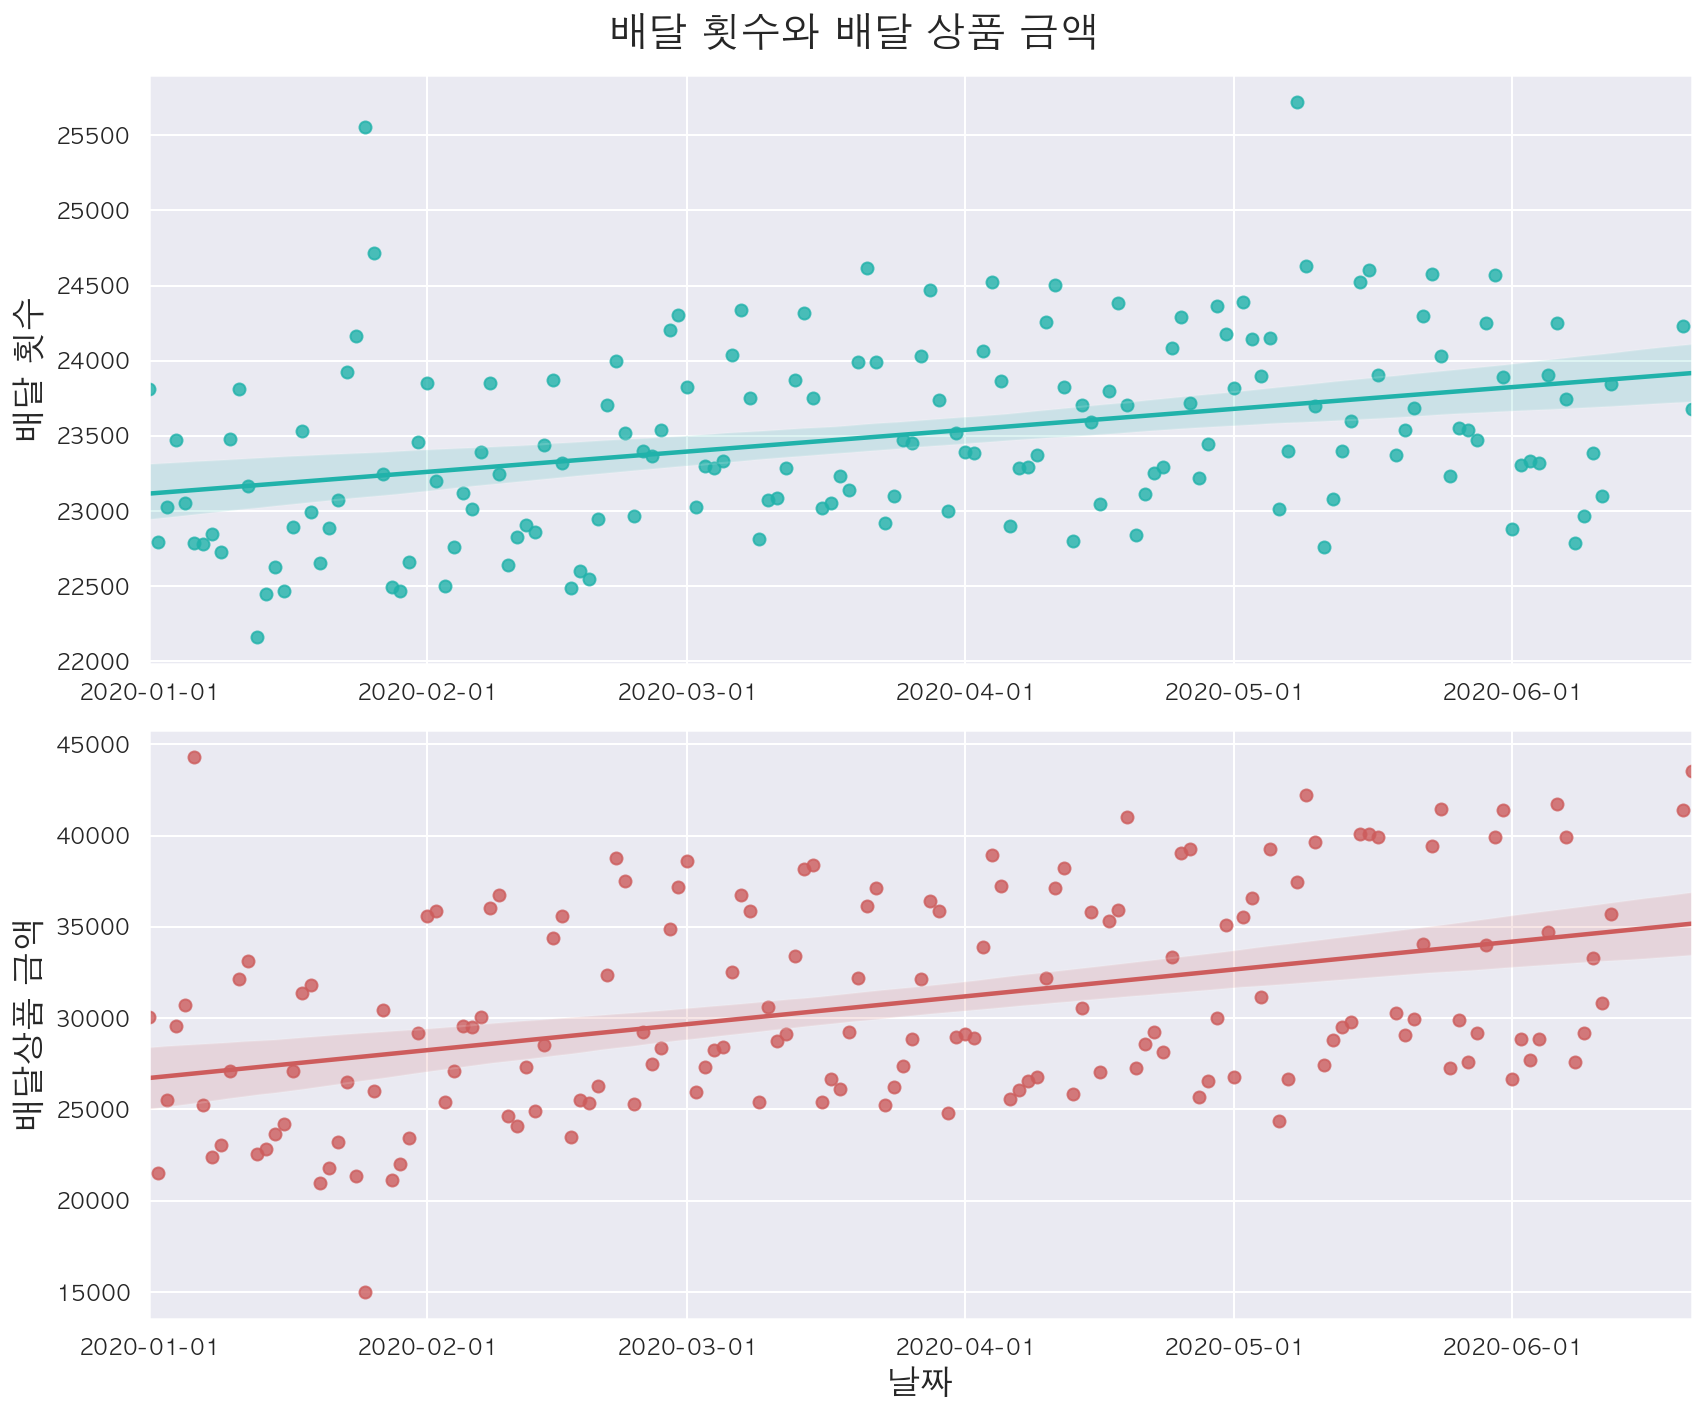

In [43]:
sns.set(style='darkgrid', font = fontname)
fig = plt.figure(figsize = (12, 10))
fig.suptitle('배달 횟수와 배달 상품 금액', fontsize = 20)

# 배달 횟수 변화 그래프 
plt.subplot(2, 1, 1)
ax1 = sns.regplot(deli_a.index, deli_a.values, color = 'lightseagreen')
a = ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.AutoDateFormatter(a))
plt.ylabel('배달 횟수', fontsize = 17)
ax1.xaxis.label.set_visible(False)

# 배달 상품 금액 변화 그래프 
plt.subplot(2, 1, 2)
ax2 = sns.regplot(deli_c.index, deli_c.values, color = 'indianred')
b = ax2.xaxis.set_major_locator(dates.MonthLocator())
ax2.xaxis.set_major_formatter(dates.AutoDateFormatter(b))
plt.xlabel('날짜', fontsize = 17)
plt.ylabel('배달상품 금액', fontsize = 17)

plt.tight_layout()

# MonthLocator 사용하니 x축에 일자까지 같이 나옴

## 2.2 온라인 음식서비스 월별 매출액

- 데이터 출처 : https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE10041&vw_cd=MT_ZTITLE&list_id=O_14&scrId=&seqNo=&lang_mode=ko&obj_var_id=&itm_id=&conn_path=K2&path=%252Fcommon%252Fmeta_onedepth.jsp

### 2.2.1 데이터 정제

In [44]:
online = pd.read_excel('data/online_food_service.xlsx')
online

년도      거래액
0      2017. 01   183355
1      2017. 02   173924
2      2017. 03   192095
3      2017. 04   196543
4      2017. 05   210565
5      2017. 06   195630
6      2017. 07   224624
7      2017. 08   253760
8      2017. 09   239118
9      2017. 10   242774
10     2017. 11   280640
11     2017. 12   339540
12     2018. 01   347457
13     2018. 02   324245
14     2018. 03   361763
15     2018. 04   365956
16     2018. 05   389395
17     2018. 06   413053
18     2018. 07   456927
19     2018. 08   496930
20     2018. 09   463750
21     2018. 10   502456
22     2018. 11   510496
23     2018. 12   630349
24     2019. 01   623920
25     2019. 02   616842
26     2019. 03   712110
27     2019. 04   687613
28     2019. 05   743966
29     2019. 06   775346
30     2019. 07   828720
31     2019. 08   914251
32     2019. 09   850015
33     2019. 10   907731
34     2019. 11  1020524
35     2019. 12  1051804
36     2020. 01  1063876
37     2020. 02  1135018
38     2020. 03  1251923
39     2020. 04  1263018
40     2020. 05  1320396
41     2020. 06  1252411
42     2020. 07  1377725
43     2020. 08  1704961
44     2020. 09  1617735
45     2020. 10  1557824
46  2020. 11 p)  1639065
47  2020. 12 p)  2198842

In [45]:
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   년도      48 non-null     object
 1   거래액     48 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 896.0+ bytes


In [46]:
online['년'] = online['년도'].apply(lambda x: x[:4])
online['월'] = online['년도'].apply(lambda x: x[6:8])
online['년월2'] = pd.to_datetime(online['년'] + '-' + online['월'])
online.head()

년도     거래액     년   월        년월2
0  2017. 01  183355  2017  01 2017-01-01
1  2017. 02  173924  2017  02 2017-02-01
2  2017. 03  192095  2017  03 2017-03-01
3  2017. 04  196543  2017  04 2017-04-01
4  2017. 05  210565  2017  05 2017-05-01

In [47]:
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   년도      48 non-null     object        
 1   거래액     48 non-null     int64         
 2   년       48 non-null     object        
 3   월       48 non-null     object        
 4   년월2     48 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.0+ KB


### 2.2.2 시각화

#### 2.2.2.1 2019년~2020년

In [48]:
online1920 = online[online['년월2'].dt.year >= 2019]
online1920

년도      거래액     년   월        년월2
24     2019. 01   623920  2019  01 2019-01-01
25     2019. 02   616842  2019  02 2019-02-01
26     2019. 03   712110  2019  03 2019-03-01
27     2019. 04   687613  2019  04 2019-04-01
28     2019. 05   743966  2019  05 2019-05-01
29     2019. 06   775346  2019  06 2019-06-01
30     2019. 07   828720  2019  07 2019-07-01
31     2019. 08   914251  2019  08 2019-08-01
32     2019. 09   850015  2019  09 2019-09-01
33     2019. 10   907731  2019  10 2019-10-01
34     2019. 11  1020524  2019  11 2019-11-01
35     2019. 12  1051804  2019  12 2019-12-01
36     2020. 01  1063876  2020  01 2020-01-01
37     2020. 02  1135018  2020  02 2020-02-01
38     2020. 03  1251923  2020  03 2020-03-01
39     2020. 04  1263018  2020  04 2020-04-01
40     2020. 05  1320396  2020  05 2020-05-01
41     2020. 06  1252411  2020  06 2020-06-01
42     2020. 07  1377725  2020  07 2020-07-01
43     2020. 08  1704961  2020  08 2020-08-01
44     2020. 09  1617735  2020  09 2020-09-01
45     2020. 10  1557824  2020  10 2020-10-01
46  2020. 11 p)  1639065  2020  11 2020-11-01
47  2020. 12 p)  2198842  2020  12 2020-12-01

In [49]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = online1920['년월2'], 
                         y = online1920['거래액'],
                         line = dict(color='firebrick', width=4), 
                         mode = 'lines+markers'
                        ))

fig.update_layout(title='온라인 음식서비스 월별 매출액',
                  xaxis_title='날짜(월별)',
                  yaxis_title='매출액',
                  xaxis_tickformat = '%Y년 <br>%m월'
                 )

In [50]:
# xlabel 변화

fig = go.Figure()

fig.add_trace(go.Scatter(x = online1920['년월2'], 
                         y = online1920['거래액'],
                         line = dict(color='firebrick', width=4), 
                         mode = 'lines+markers+text'
                        ))

fig.update_layout(title='온라인 음식서비스 월별 매출액',
                   xaxis_title='날짜(월별)',
                   yaxis_title='매출액',
                   xaxis_tickformat = '%Y <br>%m '
                 )

#### 2.2.2.2 2019년 vs 2020년

In [51]:
online19 = online[online['년월2'].dt.year == 2019]
online20 = online[online['년월2'].dt.year == 2020]

In [52]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = online20['월'].astype('int'), y = online20['거래액'], 
                         name = '2020년',
                         line = dict(color='firebrick', width=4), 
                         mode = 'lines+markers+text',
                         text = online20['거래액']
                        ))


fig.add_trace(go.Scatter(x = online19['월'].astype('int'), y = online19['거래액'], 
                         name = '2019년',
                         line = dict(color='royalblue', width=4), 
                         mode = 'lines+markers+text',
                         text = online19['거래액']
                        ))

fig.update_layout(title = '매출액 변화 그래프 (2019년 vs 2020년)',
                   xaxis_title = '월',
                   yaxis_title = '매출액')

fig.update_traces(texttemplate = '%{text:.2s}', textposition = 'top center')

# 3. 코로나19 전후 앱 이용량 변화

- 데이터 출처 : https://kdx.kr/data/view/3224

## 3.1 업종별 주말(금토일) 앱 이용량

In [53]:
app = pd.read_excel('data/2020년 1월_2월 앱 이용 데이터_수정.xlsx')
app

업종              요일  1월 첫째주 (1/3~5)  1월 둘째주 (1/10~12)  1월 셋째주 (1/17~19)  \
0      배달             금요일    2.111579e+06      2.517833e+06      2.454286e+06   
1      배달             토요일    2.551524e+06      2.802552e+06      2.890984e+06   
2      배달             일요일    2.880262e+06      3.123115e+06      2.862434e+06   
3      배달    배달 금토일 하루 평균    2.514455e+06      2.814500e+06      2.735901e+06   
4   소셜커머스             금요일    1.157984e+07      1.133668e+07      1.131533e+07   
5   소셜커머스             토요일    1.175311e+07      1.132738e+07      1.159080e+07   
6   소셜커머스             일요일    1.184197e+07      1.173416e+07      1.146452e+07   
7   소셜커머스    소셜 금토일 하루 평균    1.172497e+07      1.146607e+07      1.145688e+07   
8    대중교통             금요일    3.001059e+06      3.346756e+06      3.115895e+06   
9    대중교통             토요일    2.881352e+06      2.742370e+06      2.816131e+06   
10   대중교통             일요일    2.485701e+06      2.313000e+06      2.523618e+06   
11   대중교통  대중교통 금토일 하루 평균    2.789371e+06      2.800709e+06      2.818548e+06   
12    영화관             금요일    1.106471e+06      1.383952e+06      1.446557e+06   
13    영화관             토요일    1.235476e+06      1.350646e+06      1.439328e+06   
14    영화관             일요일    1.276471e+06      1.282517e+06      1.305926e+06   
15    영화관   영화관 금토일 하루 평균    1.206139e+06      1.339038e+06      1.397270e+06   

    1월 넷째주 (1/24~26)  2월 첫째주 (1/31~2/2)  2월 둘째주 (2/7~9)  2월 셋째주 (2/14~16)  
0       2.571396e+06       3.146737e+06    2.242374e+06      2.519570e+06  
1       2.328707e+06       3.155424e+06    3.104932e+06      3.114521e+06  
2       2.668244e+06       3.133119e+06    3.190416e+06      3.279879e+06  
3       2.522782e+06       3.145093e+06    2.845907e+06      2.971323e+06  
4       9.707902e+06       1.118018e+07    1.195944e+07      1.190339e+07  
5       1.008734e+07       1.258380e+07    1.160262e+07      1.157561e+07  
6       1.076402e+07       1.245207e+07    1.196232e+07      1.176306e+07  
7       1.018642e+07       1.207202e+07    1.184146e+07      1.174735e+07  
8       2.110746e+06       2.991609e+06    3.007083e+06      3.011071e+06  
9       2.063815e+06       2.526949e+06    1.925054e+06      2.417532e+06  
10      2.189719e+06       2.050432e+06    1.754139e+06      2.157925e+06  
11      2.121427e+06       2.522997e+06    2.228759e+06      2.528843e+06  
12      1.812766e+06       1.227969e+06    1.077286e+06      1.374938e+06  
13      2.026869e+06       1.185783e+06    1.001044e+06      1.257599e+06  
14      1.747973e+06       1.125036e+06    1.162222e+06      1.369336e+06  
15      1.862536e+06       1.179596e+06    1.080184e+06      1.333958e+06

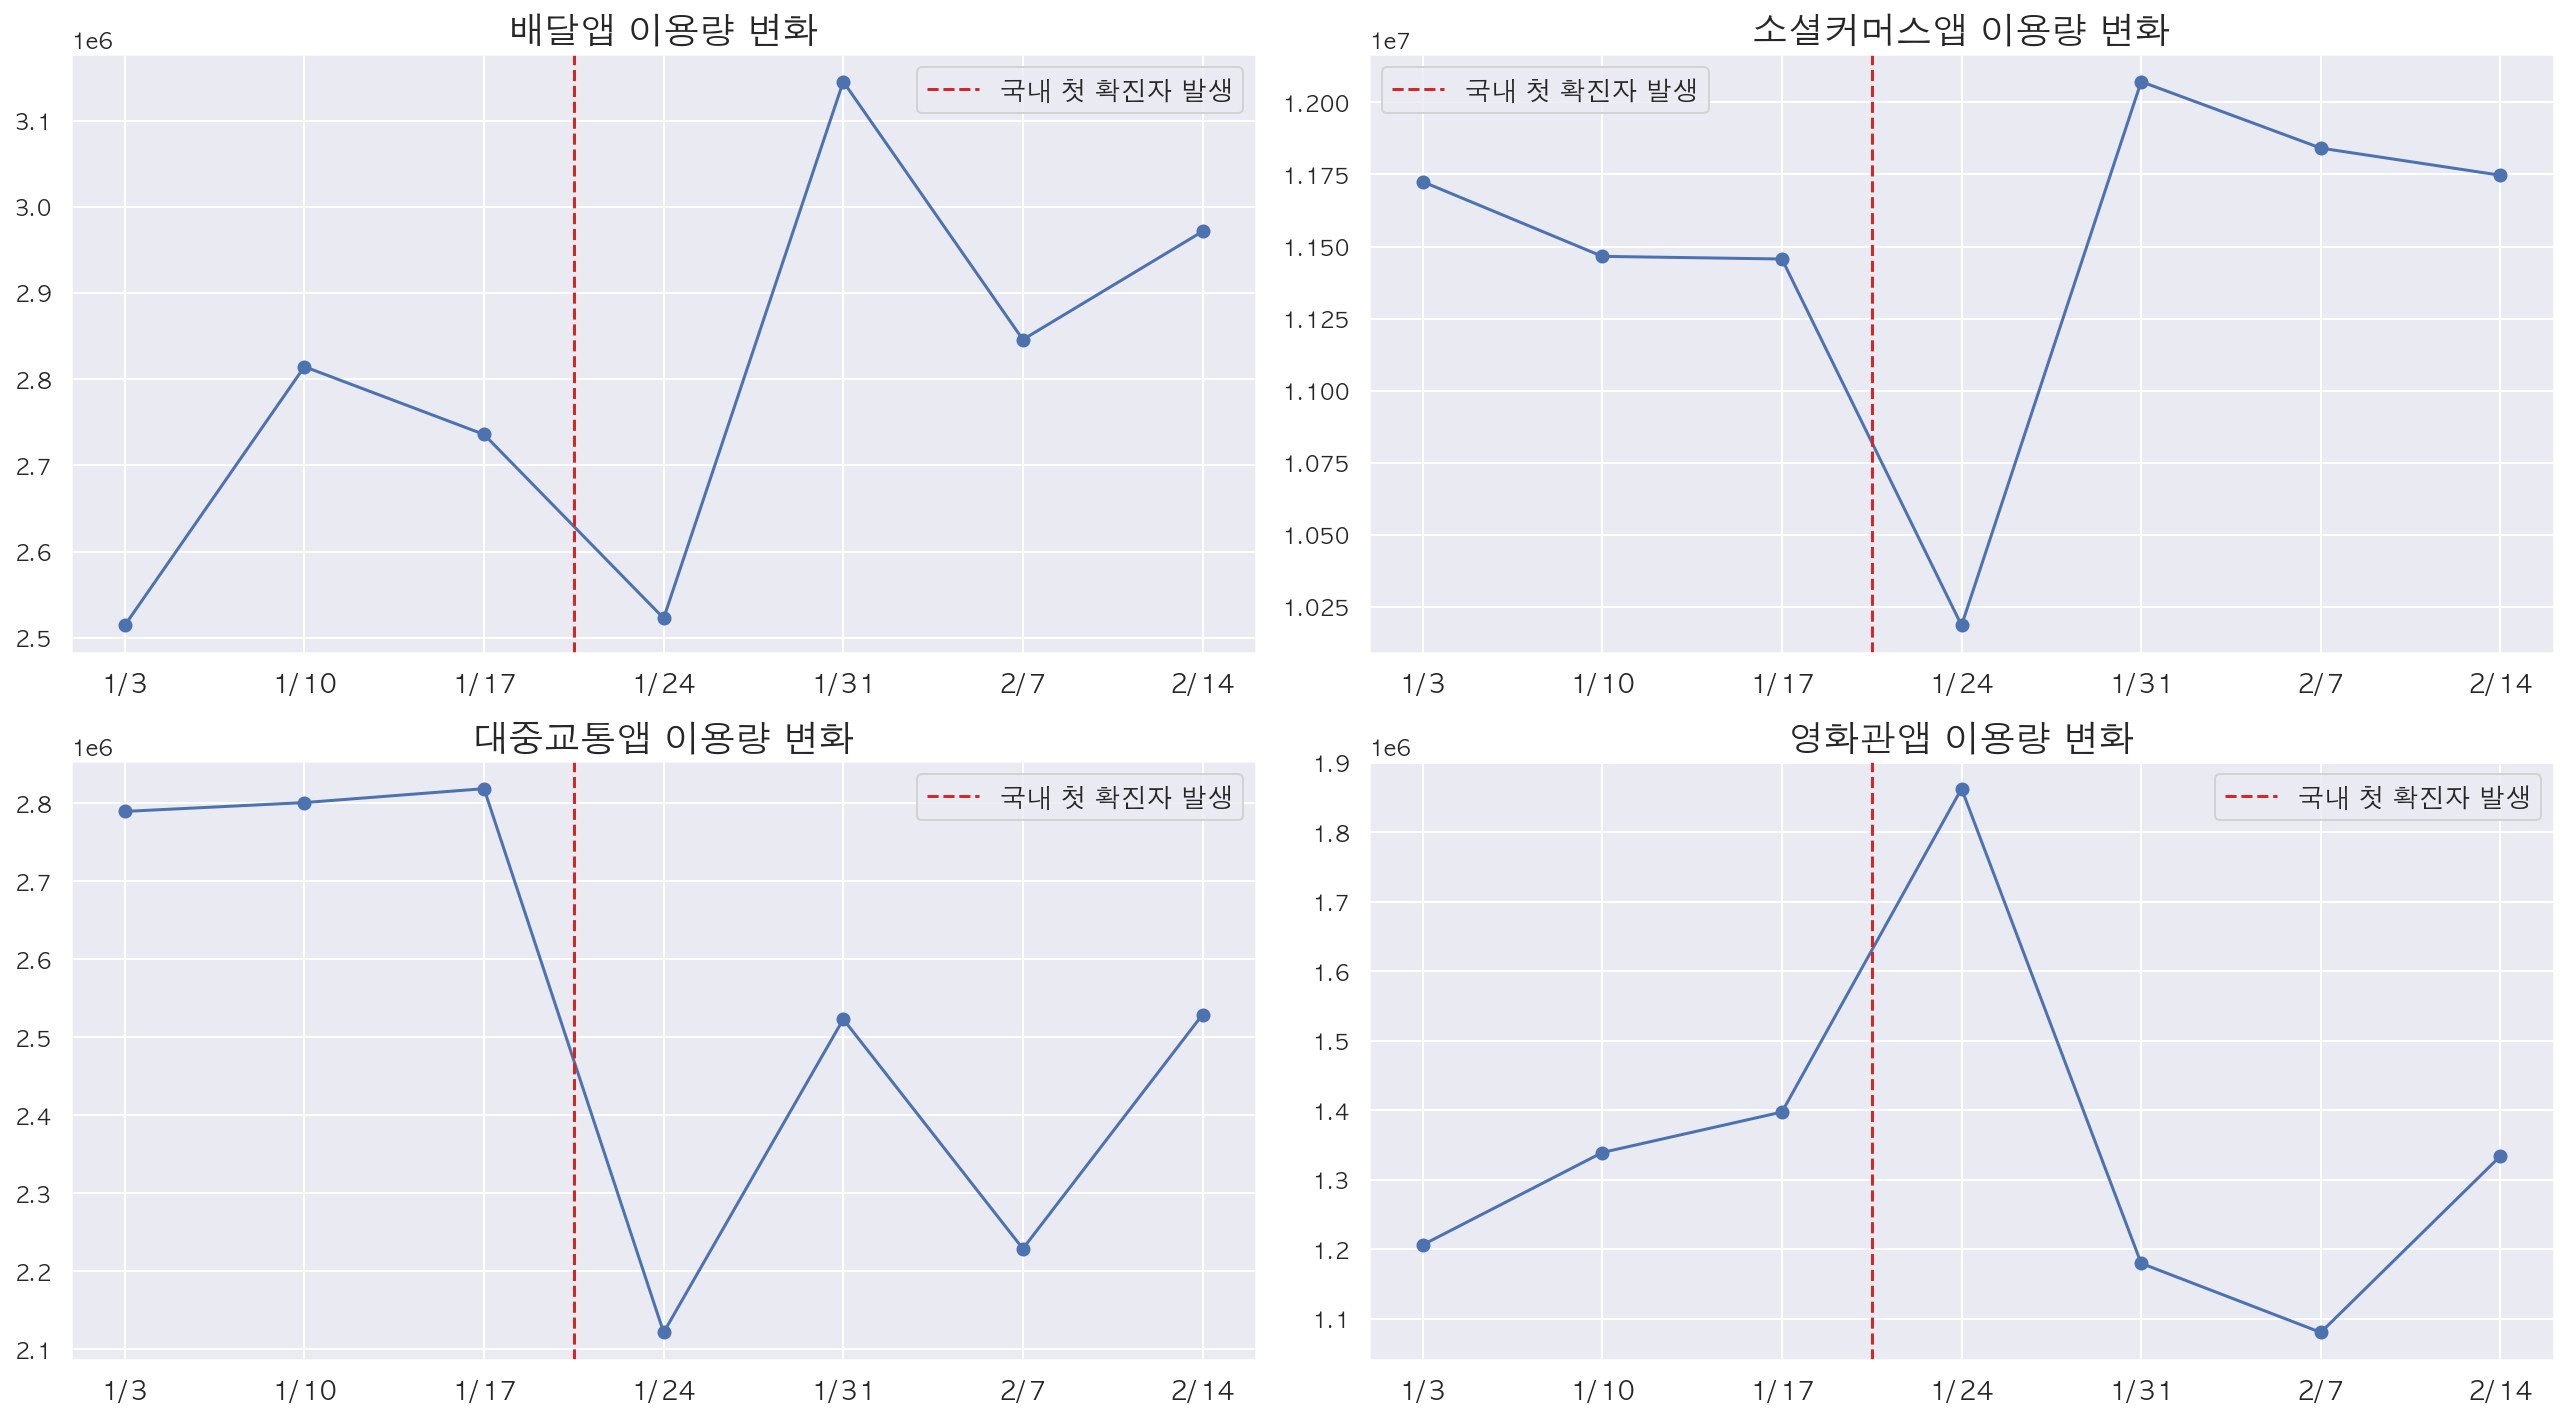

In [54]:
plt.figure(figsize = (18, 10))

for i in range(4):
    plt.subplot(2, 2, i + 1)
    n = i + 3 * (i + 1)
    plt.plot(app.iloc[n, 2:], 'o-')
    plt.axvline(2.5, c = 'tab:red', label = '국내 첫 확진자 발생', linestyle = '--')
    plt.xticks(np.arange(0, 7), ['1/3', '1/10', '1/17', '1/24', '1/31', '2/7', '2/14'], fontsize = 13)
    plt.title(f'{app.iloc[n, 0]}앱 이용량 변화', fontsize = 18)
    plt.legend(fontsize = 13)    
    
plt.tight_layout()
plt.show()

In [55]:
from sklearn.preprocessing import MinMaxScaler

minMaxScaler = MinMaxScaler()
scaled_d = minMaxScaler.fit_transform(app.iloc[3, 2:].values.reshape((-1, 1)))
scaled_s = minMaxScaler.fit_transform(app.iloc[7, 2:].values.reshape((-1, 1)))
scaled_t = minMaxScaler.fit_transform(app.iloc[11, 2:].values.reshape((-1, 1)))
scaled_m = minMaxScaler.fit_transform(app.iloc[15, 2:].values.reshape((-1, 1)))

In [56]:
scaler = [scaled_d, scaled_s, scaled_t, scaled_m]
color = ['aquamarine', 'skyblue', 'lightsteelblue', 'royalblue']

fig = go.Figure()

for i in range(len(scaler)):
    fig.add_trace(go.Scatter(x=np.array(range(0, 7)), y=scaler[i].reshape(7, ), name=f'{app.업종.unique()[i]}앱',
                         line=dict(color=color[i], width = 3), #text =scaler[i].reshape(7, ),
                         mode='lines+markers+text'
                        ))

fig.add_vrect(x0= 2.5, x1=3, 
              annotation_text="첫 확진자<br>발생", annotation_position="top",
              annotation=dict(font_size=15),
              fillcolor="lightsalmon", opacity=0.25, line_width=0)
    
fig.update_layout(title='코로나 전후 앱 이용량 변화',
                   xaxis_title='날짜',
                   yaxis_title='사용량(Scaled)',
                   xaxis = dict(
                                tickmode = 'array',
                                tickvals = [0, 1, 2, 3, 4, 5, 6],
                                ticktext = ['1/3', '1/10', '1/17', '1/24', '1/31', '2/7', '2/14']
    ))
# fig.update_traces(texttemplate = '%{text:.1s}', textposition = 'bottom center')

## 3.2 특정 앱별 이용량 변화

In [57]:
apprank = pd.read_excel('data/2020년 1월_2월 앱 이용 데이터_수정.xlsx', sheet_name=1)
apprank.head()

순위                앱이름  1월 첫째주 (1/3~5)  1월 둘째주 (1/10~12)  1월 셋째주 (1/17~19)  \
0   1     카카오톡 KakaoTalk    2.470987e+07      2.471681e+07      2.472251e+07   
1   2        네이버 - NAVER    1.552781e+07      1.566824e+07      1.574094e+07   
2   3            YouTube    1.450602e+07      1.466387e+07      1.502089e+07   
3   4             삼성 갤러리    1.100531e+07      1.139310e+07      1.131906e+07   
4   5  OK캐쉬백 [즐거움이 포인트다]    8.472387e+06      8.297115e+06      8.079567e+06   

   1월 넷째주 (1/24~26)  2월 첫째주 (1/31~2/2)  2월 둘째주 (2/7~9)  
0      2.476010e+07       2.514920e+07    2.507375e+07  
1      1.568491e+07       1.587270e+07    1.594638e+07  
2      1.440354e+07       1.470281e+07    1.482403e+07  
3      1.029802e+07       1.116208e+07    1.097091e+07  
4      8.008192e+06       8.232793e+06    8.214496e+06

In [58]:
shop = apprank[apprank.앱이름 == '쿠팡 (Coupang)']
movie = apprank[apprank.앱이름 == 'CGV']
delivery = apprank[apprank.앱이름 == '배달의민족']
public = apprank[apprank.앱이름 == '네이버 지도, 내비게이션']

In [59]:
minMaxScaler = MinMaxScaler()
shop_s = minMaxScaler.fit_transform(shop.iloc[0, 2:].values.reshape((-1, 1)))
movie_s = minMaxScaler.fit_transform(movie.iloc[0, 2:].values.reshape((-1, 1)))
delivery_s = minMaxScaler.fit_transform(delivery.iloc[0, 2:].values.reshape((-1, 1)))
public_s = minMaxScaler.fit_transform(public.iloc[0, 2:].values.reshape((-1, 1)))

In [60]:
scaler = [delivery_s, shop_s, public_s, movie_s]
namelst = ['배달의민족', '쿠팡', '네이버지도', 'CGV']
color = ['aquamarine', 'skyblue', 'lightsteelblue', 'royalblue']

fig = go.Figure()

for i in range(len(scaler)):
    fig.add_trace(go.Scatter(x=np.array(range(0, 6)), y=scaler[i].reshape(6, ), name=namelst[i],
                         line=dict(color=color[i], width = 3), # text =scaler[i].reshape(6, ),
                         mode='lines+markers+text'
                        ))

fig.add_vrect(x0= 2.5, x1=3, 
              annotation_text="첫 확진자<br>발생", annotation_position="top",
              annotation=dict(font_size=15),
              fillcolor="lightsalmon", opacity=0.25, line_width=0)

    
fig.update_layout(title='코로나 전후 앱 이용량 변화',
                   xaxis_title='날짜',
                   yaxis_title='사용량(Scaled)',
                   xaxis = dict(
                                tickmode = 'array',
                                tickvals = [0, 1, 2, 3, 4, 5],
                                ticktext = ['1/3', '1/10', '1/17', '1/24', '1/31', '2/7']
    ))
# fig.update_traces(texttemplate = '%{text:.1s}', textposition = 'bottom center')

### 3.2.1 각 앱별 사용량 비교

In [61]:
opt = [delivery, shop, public, movie]
namelst = ['배달의민족', '쿠팡', '네이버지도', 'CGV']
color = ['aquamarine', 'skyblue', 'lightsteelblue', 'royalblue']

def plotline(i):
    
    fig = go.Figure()

    fig.add_trace(go.Scatter(x = np.array(range(0, 6)), y = opt[i].iloc[:, 2:].values.reshape(6, ),
                                line = dict(color = color[i], width = 3), text = opt[i].iloc[:, 2:].values.reshape(6, ),
                                 mode = 'lines+markers+text'))

    fig.update_layout(title=f'{namelst[i]} 앱 이용량 변화',
                       xaxis_title='날짜',
                       yaxis_title='이용량',
                       xaxis = dict(
                                tickmode = 'array',
                                tickvals = [0, 1, 2, 3, 4, 5],
                                ticktext = ['1/3', '1/10', '1/17', '1/24', '1/31', '2/7']
    ))
    
    percent = (opt[i].iloc[:, 2:].values[0][4] - opt[i].iloc[:, 2:].values[0][2])/opt[i].iloc[:, 2:].values[0][2] * 100
    
    if percent >= 0 :
        fig.add_vrect(x0= 2, x1=4, 
                  annotation_text=f"{round(percent, 2)}% 상승 (2주간)", annotation_position="bottom",
                  annotation=dict(font_size=15),
                  fillcolor="lightsalmon", opacity=0.25, line_width=0)
    else :
        fig.add_vrect(x0= 2, x1=4, 
                  annotation_text=f"{round(-percent, 2)}% 감소 (2주간)", annotation_position="bottom",
                  annotation=dict(font_size=15),
                  fillcolor="lightsalmon", opacity=0.25, line_width=0)
    
    fig.add_vline(x=2.5, line_dash="dot",
              annotation_text="국내 첫 확진자 발생", 
              annotation_position="top left")

    fig.update_traces(texttemplate = '%{text:.3s}', textposition = 'top center')
    fig.show()

In [62]:
plotline(0)

In [63]:
plotline(1)

In [64]:
plotline(2)

In [65]:
plotline(3)

# 4. 국내 택배 물동량 및 1인당 연간 택배 이용량 추이 데이터

- 데이터 출처 : https://www.nlic.go.kr/nlic/parcelServiceLogistics.action

In [66]:
logi_c = pd.read_excel('data/04_parcelServiceUseCount (1).xlsx')
logi_c

국민 1인당  경제활동 인구 1인당  Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  \
0  2000년     2.4          5.0         NaN         NaN         NaN         NaN   
1  2005년    11.1         22.3         NaN         NaN         NaN         NaN   
2  2010년    25.0         48.8         NaN         NaN         NaN         NaN   
3  2015년    35.7         67.9         NaN         NaN         NaN         NaN   
4  2017년    44.8         84.9         NaN         NaN         NaN         NaN   
5  2018년    49.1         92.2         NaN         NaN         NaN         NaN   
6  2019년    53.8         99.3         NaN         NaN         NaN         NaN   
7  2020년    65.1        122.0         NaN         NaN         NaN         NaN   

   Unnamed: 7  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
5         NaN  
6         NaN  
7         NaN

In [67]:
logic = logi_c.iloc[4:, :3]
logic

국민 1인당  경제활동 인구 1인당
4  2017년    44.8         84.9
5  2018년    49.1         92.2
6  2019년    53.8         99.3
7  2020년    65.1        122.0

In [68]:
logic.columns = ['날짜', '국민 1인당', '경제활동 인구 1인당']
logic

날짜  국민 1인당  경제활동 인구 1인당
4  2017년    44.8         84.9
5  2018년    49.1         92.2
6  2019년    53.8         99.3
7  2020년    65.1        122.0

In [69]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = np.array(range(0, 4)), y = logic['국민 1인당'].values, name = '국민 1인당 택배 이용량',
                            line = dict(color = 'skyblue', width = 3), text = logic['국민 1인당'].values,
                             mode = 'lines+markers+text'))

fig.update_layout(title='국민 1인당 택배 이용량 변화',
                   xaxis_title='년도',
                   yaxis_title='택배 이용량',
                   xaxis = dict(
                                tickmode = 'array',
                                tickvals = [0, 1, 2, 3],
                                ticktext = logic['날짜'].values
    ))

percent = (logic.iloc[-1, 1] - logic.iloc[-2, 1]) / logic.iloc[-2, 1] * 100

fig.add_annotation(
    xref="x",
    yref="y",
    x=2.6,
    y=58,
    text=f"{round(percent, 2)}%상승",
    axref="x",
    ayref="y",
    ax=2.6,
    ay=53,
    arrowhead=2,
    arrowwidth=1.5,
    font = dict(size = 15)
)

fig.update_traces(texttemplate = '%{text:.3s}', textposition = 'top center')

In [70]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = np.array(range(0, 4)), y = logic['경제활동 인구 1인당'].values, name = '경제활동 인구 1인당 택배 이용량',
                            line = dict(color = 'royalblue', width = 3), text = logic['경제활동 인구 1인당'].values,
                             mode = 'lines+markers+text'))

fig.update_layout(title='경제활동 인구 1인당 택배 이용량 변화',
                   xaxis_title='년도',
                   yaxis_title='택배 이용량',
                   xaxis = dict(
                                tickmode = 'array',
                                tickvals = [0, 1, 2, 3],
                                ticktext = logic['날짜'].values
    ))

percent = (logic.iloc[-1, 2] - logic.iloc[-2, 2]) / logic.iloc[-2, 2] * 100

fig.add_annotation(
    xref="x",
    yref="y",
    x=2.6,
    y=110,
    text=f"{round(percent, 2)}%상승",
    axref="x",
    ayref="y",
    ax=2.6,
    ay=102,
    arrowhead=2,
    arrowwidth=1.5,
    font = dict(size = 15)
)

fig.update_traces(texttemplate = '%{text:.3s}', textposition = 'top center')